___

<a href='http://www.pieriandata.com'><img src='content/Pierian_Data_Logo.png'/></a>
___
<center><em>Авторские права принадлежат Pierian Data Inc.</em></center>
<center><em>Для дополнительной информации посетите наш сайт <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Метод главных компонент (Principal Component Analysis) - Проверочные задания

-----
-----

## Цель: выяснить с помощью метода главных компонент, какие написанные от руки цифры наиболее сильно отличаются друг от друга.

**Представьте, что Вы работаете с задачей распознавания изображений для почтовой компании. Было бы очень полезно читать цифры автоматически, даже если они написаны вручную (сейчас именно так и происходит в почтовых компаниях, причём распознавание цифр работает даже лучше, чем это может делать человек). Руководитель почтовой компании хотел бы выяснить, какие цифры распознаются наиболее сложно, чтобы можно было получить для этих цифр побольше размеченных данных. Вы будете работать с очень известным набором данных, который содержит написанные от руки цифры. С помощью метода главных компонент Вы выясните, какие цифры легче отличимы от других цифр.**

-----
-----

# Данные


Источник данных: https://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits

    E. Alpaydin, Fevzi. Alimoglu
    Department of Computer Engineering
    Bogazici University, 80815 Istanbul Turkey
    alpaydin '@' boun.edu.tr


## Выполните задания, написанные жирным шрифтом

**Задание: запустите ячейки для импорта библиотек и загрузки данных из файла в датафрейм.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
digits = pd.read_csv('../DATA/digits.csv')

In [3]:
digits

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,number_label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


**Задание: создайте новый датафрейм, назовите его *pixels*, в котором будут только значения для пикселей. Для этого удалите колонку number_label.**

In [4]:
pixels = digits.drop('number_label', axis=1)

In [5]:
pixels

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


### Выводим изображение на экран

**Задание: возьмите только один ряд пикселей - для этого возьмите первую строку в датафрейме pixels.**

In [6]:
pixels.iloc[0]

pixel_0_0     0.0
pixel_0_1     0.0
pixel_0_2     5.0
pixel_0_3    13.0
pixel_0_4     9.0
             ... 
pixel_7_3    13.0
pixel_7_4    10.0
pixel_7_5     0.0
pixel_7_6     0.0
pixel_7_7     0.0
Name: 0, Length: 64, dtype: float64

In [7]:
zero_pixels = pixels.iloc[0]

**Задание: преобразуйте полученный ранее объект Series (первая строка датафрейма) в массив numpy.**

In [8]:
zero_arr = np.array(zero_pixels)

In [9]:
zero_arr

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

**Задание: поменяйте форму этого массива numpy в размерность (8,8) с помощью reshape.**

In [10]:
zero_arr = zero_arr.reshape(8, 8)

In [11]:
zero_arr.shape

(8, 8)

**Задание: С помощью Matplotlib или Seaborn выведите этот массив на экран - должно получиться изображение цифры, написанной от руки. Помните что параметры palette/cmap могут менять цвета, но не могут менять значения пикселей.**

<AxesSubplot:>

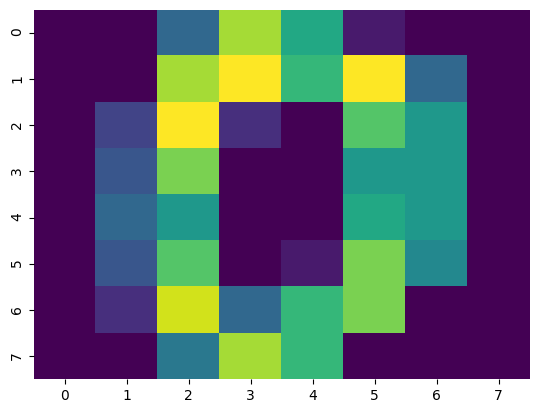

In [12]:
sns.heatmap(zero_arr, cmap='viridis', cbar=False)

<AxesSubplot:>

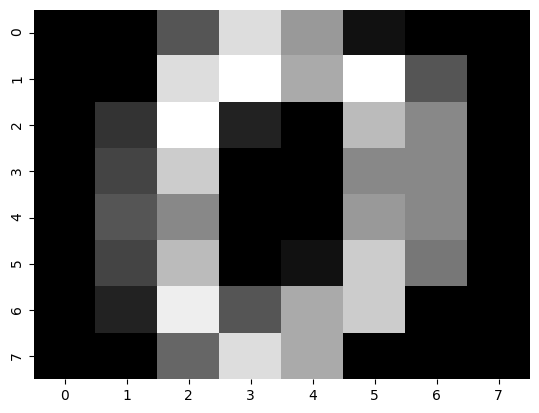

In [13]:
sns.heatmap(zero_arr, cmap='gray', cbar=False)

<AxesSubplot:>

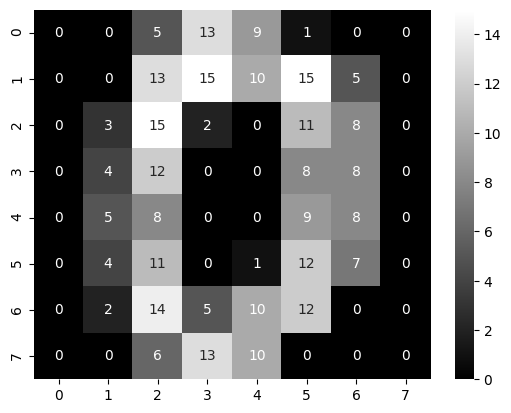

In [14]:
sns.heatmap(zero_arr, cmap='gray', annot=True)

## Масштабирование данных

**Задание: с помощью Scikit-Learn выполните масштабирование датафрейма с пикселями.**

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [ ]:
scaled_arr = scaler.fit_transform(zero_arr)

In [18]:
scaled_arr

array([[ 0.        , -1.1717002 , -1.57142857,  1.13554995,  0.83862787,
        -1.49255579, -1.24807544,  0.        ],
       [ 0.        , -1.1717002 ,  0.71428571,  1.45999279,  1.04828484,
         1.29354835,  0.13867505,  0.        ],
       [ 0.        ,  0.39056673,  1.28571429, -0.64888568, -1.04828484,
         0.4975186 ,  0.97072534,  0.        ],
       [ 0.        ,  0.91132238,  0.42857143, -0.97332853, -1.04828484,
        -0.09950372,  0.97072534,  0.        ],
       [ 0.        ,  1.43207802, -0.71428571, -0.97332853, -1.04828484,
         0.09950372,  0.97072534,  0.        ],
       [ 0.        ,  0.91132238,  0.14285714, -0.97332853, -0.83862787,
         0.69652603,  0.69337525,  0.        ],
       [ 0.        , -0.13018891,  1.        , -0.16222142,  1.04828484,
         0.69652603, -1.24807544,  0.        ],
       [ 0.        , -1.1717002 , -1.28571429,  1.13554995,  1.04828484,
        -1.69156322, -1.24807544,  0.        ]])

## Метод главных компонент (PCA - Principal Component Analysis)

**Задание: примените метод главных компонент к промасштабированному набору пикселей, выделяя 2 главные компоненты.**

In [9]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA(n_components=2)

In [21]:
principal_components = pca.fit_transform(scaled_arr)

In [22]:
principal_components

array([[ 2.90580659, -1.0678416 ],
       [ 1.00613703,  2.18674241],
       [-1.90744764,  0.51369585],
       [-1.86239713, -0.60130465],
       [-1.8317251 , -1.33430394],
       [-1.80482087, -0.2092833 ],
       [ 0.51599024,  1.45581164],
       [ 2.97845688, -0.94351641]])

**Задание: выясните, сколько вариативности объясняется этими 2 главными компонентами.**

In [23]:
np.sum(pca.explained_variance_ratio_)

0.9102980388045379

**Задание: постройте график scatterplot для цифр в 2-мерном пространстве главных компонент, раскрашивая график разными цветами на основе колонки number_label в исходном датафрейме.**

In [10]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(pixels)
scaled_df

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [11]:
pca = PCA(n_components=2)

principal_components = pca.fit_transform(scaled_df)

In [ ]:
plt.figure(figsize=(10, 6), dpi=200)

sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=digits['number_label'], palette='Set1')

plt.legend(loc=(1, 0.5))
plt.show()

-----------
---------

## Бонусное задание 

**Задание: постройте "интерактивный" 3D-график с результатыми работы метода главных компонент для 3 главных компонент. Это можно сделать разными способами с помощью различных библиотек, например plotly или bokeh, но на самом деле это можно сделать с помощью только Matplotlib и Jupyter Notebook. При необходимости поищите решение в гугле или другом поисковике или на StackOverflow.**

In [16]:
pca = PCA(n_components=3)

In [17]:
principal_components = pca.fit_transform(scaled_df)

In [18]:
principal_components

array([[ 1.91421689, -0.95446931, -3.94598386],
       [ 0.58897856,  0.92461425,  3.92473   ],
       [ 1.30203707, -0.3172104 ,  3.02328392],
       ...,
       [ 1.02259425, -0.14791758,  2.46993351],
       [ 1.0760538 , -0.38090676, -2.45547408],
       [-1.25769975, -2.22754288,  0.28368335]])

In [22]:
X = principal_components

In [23]:
fig = plt.figure(dpi=200)

ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=digits['number_label'])

plt.show()

<IPython.core.display.Javascript object>

In [ ]:
from mpl_toolkits import mplot3d

In [ ]:
ax = plt.axes(projection='3d')
ax.scatter3D(pca_pixels[:,0],pca_pixels[:,1],pca_pixels[:,2],c=digits['number_label']);

# Отличная работа!